<h1><font color="#1d3557" size=6>Trabajo Final - Módulo Supervised Learning</font></h1>

![banner](https://thumbs.dreamstime.com/b/cogs-gears-industrial-global-business-background-background-integration-binary-technology-banner-background-vector-illustration-180798145.jpg)

***Author:*** *César Chalco Elias*

***Twitter:*** *[@chesar_che](https://twitter.com/chesar_che)*

**Propósito:** *Desarrollar un modelo de clasificación para conocer si determinada empresa se ha visto impactado por efecto de la pandemia. Para ello, se empleará un dataset con la actividad comercial de la empresa y se tratará de predecir la variable **Impactado**.*

# 1. Introducción

## 1.1 Carga de librerias

In [1]:
# Necessary Pips
# pip install altair==4.2.0rc1
# pip install openpyxl
# pip install lightgbm
# pip install boruta

In [2]:
import numpy as np
import pandas as pd
import random

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import missingno as msno

from scipy.spatial.distance import mahalanobis
import scipy as sp

import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from boruta import BorutaPy

from plot_metric.functions import BinaryClassification

from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
print(' ..:: VERSIONS ::..')
print(f' Numpy version: {np.__version__}')
print(f' Pandas version: {pd.__version__}')
print(f' Seaborn version: {sns.__version__}')
print(f' Matplotlib version: {mpl.__version__}')
print(f' Scikit Learn version: {skl.__version__}')

 ..:: VERSIONS ::..
 Numpy version: 1.22.1
 Pandas version: 1.3.4
 Seaborn version: 0.11.2
 Matplotlib version: 3.5.0
 Scikit Learn version: 1.0.1


In [4]:
random.seed(10)

## 1.2 Carga del dataset

- *Data Review:*

|    **VARIABLE**     |                **DESCRIPCIÓN**                      |
| ---:                | :---                                                | 
|Sector               |	Sector donde trabaja la empresa|
|Dep	              | departamento|
|Impactado	          | target|
|Saldo	              | deuda de la empresa|
|Desembolso_mes	      | nueva deuda del mes de la empresa|
|Saldo                | Promedio	deuda promedio de la empresa|
|Deuda Sistea	      | deuda que reporta en todo el sistema financiero|
|Pasivo               | horros de la empresa|
|Turismo	          | pertenece a turismo?|
|Sector de Impacto	  | actividades económicas más impactadas por las empresas|
|Venta                | ventas de la empresa|
|Venta Formal	      | venta formal de la empresa|
|Pasivo_desembolso	  | pasivo - desembolso|
|Deuda rezagada va	  |  variación de deuda absoluta|
|Deuda rezagada vr	  |  variación de deuda relativa|
|pasivo rezagada va	  |  variación de ahorros absoluta|
|pasivo rezagada vr	  | variación de ahorros relativa|
|Pasivo_desembolso da |	ahorros menos desembolso diferencia absoluta|
|Pasivo_desembolso dr |	ahorros menos desembolso diferencia relativa|

- Lectura del dataset:

In [5]:
path = 'data/file.csv'

In [6]:
%%time
raw_data = pd.read_csv(path, delimiter=';')

Wall time: 15.9 ms


In [7]:
raw_data

,Sector,Dep,Impactado,Saldo,Desembolso_mes,Saldo Promedio,"Deuda Sistea,",Pasivo,Turismo,Sector de Impacto,Venta,Venta Formal,Pasivo_desembolso,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,pasivo rezagada vr,Pasivo_desembolso da,Pasivo_desembolso dr
0,INDUSTRIA,Lima,0,56643.10092,0.0,28321.550460,31365.73,5876.82,0,3,108400.0,43741.08,5876.820,-800.65,-0.024891,830.82,0.164649,830.82,0.164649
1,COMERCIO,Arequipa,0,190313.99460,0.0,63437.998180,64864.99,4467.40,0,4,105300.0,69737.17,4467.400,-2810.52,-0.041529,-7043.43,-0.611896,-7043.43,-0.611896
2,SERVICIO,Amazonas,0,547601.57360,0.0,182533.857900,200239.32,5000.92,0,1,86600.0,79178.83,5000.920,653.68,0.003275,2000.92,0.666973,2000.92,0.666973
3,INDUSTRIA,Lima,0,283914.20840,0.0,94638.069470,112945.17,325.50,0,3,103000.0,0.00,325.500,14820.77,0.151041,-17128.30,-0.981351,-17128.30,-0.981351
4,COMERCIO,Cusco,0,142296.43840,0.0,47432.146120,144877.21,0.00,0,4,172920.0,171999.33,0.000,17468.60,0.137107,-2071.80,-1.000000,-2071.80,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,COMERCIO,Lambayeque,1,4325.85076,0.0,1441.950253,1624.47,2558.31,0,4,30000.0,4905.00,2528.565,-710.56,-0.304304,-3174.29,-0.550924,-2548.50,-0.543144
1994,COMERCIO,Arequipa,1,94650.62631,0.0,31550.208770,75502.84,3029.48,0,4,32100.0,7034.00,3029.480,-5421.28,-0.066992,-10965.03,-0.783524,-10965.03,-0.783524
1995,COMERCIO,Lima,1,747579.33510,0.0,249193.111700,843972.49,593.99,0,3,180905.0,93482.00,593.990,6776.19,0.008094,-11589.60,-0.951247,-11589.60,-0.951247
1996,COMERCIO,Lima,1,18077.98187,0.0,6025.993957,122633.10,5312.64,0,3,69500.0,8333.00,5312.640,-3838.01,-0.030347,-18929.55,-0.780851,-18929.55,-0.780851


# 2. Descripción del dataset

## 2.1 Forma del dataset

In [8]:
raw_data.columns

Index(['Sector', 'Dep', 'Impactado', 'Saldo', 'Desembolso_mes',
       'Saldo Promedio', 'Deuda Sistea,', 'Pasivo', 'Turismo',
       'Sector de Impacto', 'Venta ', 'Venta Formal', 'Pasivo_desembolso',
       'Deuda rezagada va', 'Deuda rezagada vr', 'pasivo rezagada va',
       'pasivo rezagada vr', 'Pasivo_desembolso da', 'Pasivo_desembolso dr'],
      dtype='object')

In [9]:
raw_data.columns = ['sector','dep','impactado','saldo','desembolso_mes',
                   'saldo_promedio','deuda_sistea','pasivo','turismo',
                   'sector_de_impacto','venta','venta_formal','pasivo_desembolso',
                   'deuda_rezagada_va','deuda_rezagada_vr','pasivo_rezagada_va',
                   'pasivo_rezagada_vr','pasivo_desembolso_da','pasivo_desembolso_dr']

In [10]:
raw_data.columns

Index(['sector', 'dep', 'impactado', 'saldo', 'desembolso_mes',
       'saldo_promedio', 'deuda_sistea', 'pasivo', 'turismo',
       'sector_de_impacto', 'venta', 'venta_formal', 'pasivo_desembolso',
       'deuda_rezagada_va', 'deuda_rezagada_vr', 'pasivo_rezagada_va',
       'pasivo_rezagada_vr', 'pasivo_desembolso_da', 'pasivo_desembolso_dr'],
      dtype='object')

In [11]:
raw_data.shape

(1998, 19)

## 2.2 Tipos de datos

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sector                1998 non-null   object 
 1   dep                   1998 non-null   object 
 2   impactado             1998 non-null   int64  
 3   saldo                 1998 non-null   float64
 4   desembolso_mes        1998 non-null   float64
 5   saldo_promedio        1998 non-null   float64
 6   deuda_sistea          1998 non-null   float64
 7   pasivo                1998 non-null   float64
 8   turismo               1998 non-null   int64  
 9   sector_de_impacto     1998 non-null   int64  
 10  venta                 1998 non-null   float64
 11  venta_formal          1998 non-null   float64
 12  pasivo_desembolso     1998 non-null   float64
 13  deuda_rezagada_va     1998 non-null   float64
 14  deuda_rezagada_vr     1998 non-null   float64
 15  pasivo_rezagada_va   

## 2.3 Memoria usada

In [13]:
raw_data.memory_usage(deep=True)

Index                      128
sector                  130126
dep                     134421
impactado                15984
saldo                    15984
desembolso_mes           15984
saldo_promedio           15984
deuda_sistea             15984
pasivo                   15984
turismo                  15984
sector_de_impacto        15984
venta                    15984
venta_formal             15984
pasivo_desembolso        15984
deuda_rezagada_va        15984
deuda_rezagada_vr        15984
pasivo_rezagada_va       15984
pasivo_rezagada_vr       15984
pasivo_desembolso_da     15984
pasivo_desembolso_dr     15984
dtype: int64

## 2.4 Observaciones duplicadas

In [14]:
duplicated_values = raw_data.duplicated()

In [15]:
raw_data.loc[duplicated_values].sample(10)

,sector,dep,impactado,saldo,desembolso_mes,saldo_promedio,deuda_sistea,pasivo,turismo,sector_de_impacto,venta,venta_formal,pasivo_desembolso,deuda_rezagada_va,deuda_rezagada_vr,pasivo_rezagada_va,pasivo_rezagada_vr,pasivo_desembolso_da,pasivo_desembolso_dr
1905,SERVICIO,Cusco,1,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144
586,COMERCIO,Lima,0,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144
314,SERVICIO,Lima,0,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144
791,COMERCIO,Pasco,0,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144
1238,COMERCIO,Arequipa,1,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144
1569,COMERCIO,Lima,1,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144
877,SERVICIO,Arequipa,0,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144
948,SERVICIO,Lambayeque,0,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144
1439,COMERCIO,Piura,1,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144
1978,COMERCIO,San Martín,1,244225.7127,0.0,82224.11698,154027.21,2558.31,0,3,69500.0,8333.0,2528.565,-2179.09,-0.014269,-3174.29,-0.550924,-2548.5,-0.543144


In [16]:
raw_data.loc[duplicated_values].shape[0]

99

- Por ser data sintética, voy a asumir que la repetición de los valores en las 99 filas es propia de la generación de valores al momento de crear el conjunto de datos. Por lo tanto, los valores no van a ser removviods del dataset.

## 2.5 Cantidad de zero values

In [17]:
(raw_data == 0).mean() * 100

sector                   0.000000
dep                      0.000000
impactado               50.000000
saldo                    0.000000
desembolso_mes          99.799800
saldo_promedio           0.000000
deuda_sistea             0.100100
pasivo                   5.255255
turismo                 94.494494
sector_de_impacto        0.000000
venta                    0.000000
venta_formal            19.919920
pasivo_desembolso        5.255255
deuda_rezagada_va        2.602603
deuda_rezagada_vr        2.552553
pasivo_rezagada_va       2.252252
pasivo_rezagada_vr       0.900901
pasivo_desembolso_da     2.252252
pasivo_desembolso_dr     0.900901
dtype: float64

- Las variables **Desenbolso_mes** y **Turismo** tienen cantidades excesivamente altas de ceros, lo que hace que aporten muy poco al modelo a desarrollar. Debido a ello, serán removidas del dataset.

# 3. Tratamiento del dataset

In [18]:
data = raw_data.copy()

## 3.1 Tratamiento de zero values

In [19]:
data.shape

(1998, 19)

In [20]:
data = data.drop(['desembolso_mes','turismo'],axis=1)

In [21]:
data.shape

(1998, 17)

In [22]:
(data == 0).mean() * 100

sector                   0.000000
dep                      0.000000
impactado               50.000000
saldo                    0.000000
saldo_promedio           0.000000
deuda_sistea             0.100100
pasivo                   5.255255
sector_de_impacto        0.000000
venta                    0.000000
venta_formal            19.919920
pasivo_desembolso        5.255255
deuda_rezagada_va        2.602603
deuda_rezagada_vr        2.552553
pasivo_rezagada_va       2.252252
pasivo_rezagada_vr       0.900901
pasivo_desembolso_da     2.252252
pasivo_desembolso_dr     0.900901
dtype: float64

## 3.2 Tratamiento de valores perdidos

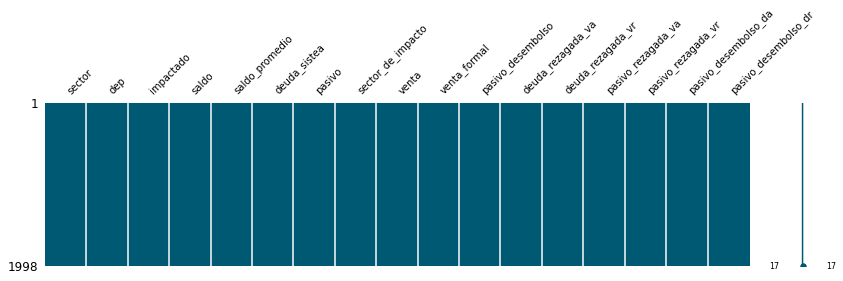

In [23]:
msno.matrix(data,
           color=(0.0, 0.35, 0.45),
           figsize=(14,3),
           fontsize=10)
plt.show()

In [24]:
data.isnull().mean()

sector                  0.0
dep                     0.0
impactado               0.0
saldo                   0.0
saldo_promedio          0.0
deuda_sistea            0.0
pasivo                  0.0
sector_de_impacto       0.0
venta                   0.0
venta_formal            0.0
pasivo_desembolso       0.0
deuda_rezagada_va       0.0
deuda_rezagada_vr       0.0
pasivo_rezagada_va      0.0
pasivo_rezagada_vr      0.0
pasivo_desembolso_da    0.0
pasivo_desembolso_dr    0.0
dtype: float64

- El dataset no cuenta con missing values en su contenido.

## 3.3 Tratamiento de valores atípicos

In [25]:
numerical_columns = list(data.select_dtypes(['int','float']).columns)

In [26]:
categorical_columns = list(data.select_dtypes(['object']).columns)

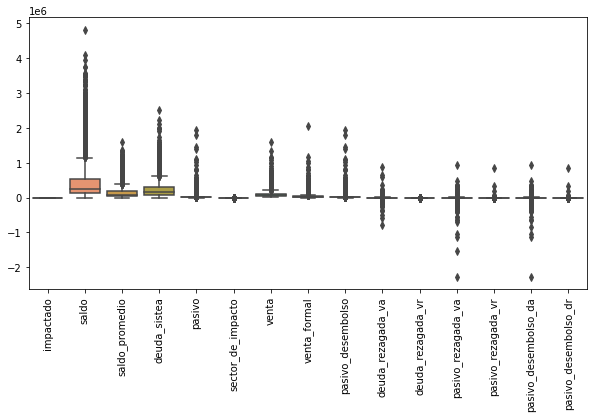

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax = sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

- A partir de los diagramas de caja y bigotes realizados, se infiere que existen outliers tanto por encima como por debajo de la distribución de las variables.

### 3.3.1 Detección univariante

In [28]:
low_pp = list(np.arange(0.01,0.11,0.01))
high_pp = list(np.arange(0.91,1.01,0.01))

low_pp = [round(x, 2) for x in low_pp]
high_pp = [round(x, 2) for x in high_pp]

#### 3.3.1.1 Detección de valores atípicos inferiores

In [29]:
def get_min_outliers_ratio(df):
    df_columns = list(df.columns)
    for column in df_columns:
        print()
        max_value = round(float(df.loc['max', str(column)]), 2)
        min_value = round(float(df.loc['min', str(column)]), 2)
        pp_value_01 = round(float(df.loc['2.5%', str(column)]), 2)
        pp_value_02 = round(float(df.loc['5%', str(column)]), 2)
        pp_value_03 = round(float(df.loc['7.5%', str(column)]), 2)
        if max_value > 1.0:
            if pp_value_01!=0 and pp_value_02!=0 and pp_value_03!=0 and min_value!=0:
                ratio_01 = round(pp_value_01 / min_value, 3)
                ratio_02 = round(pp_value_02 / pp_value_01, 3)
                ratio_03 = round(pp_value_03 / pp_value_02, 3)
                print(f' → Ratios of <<{column}>> column: (2.5% → {ratio_01}) (5% → {ratio_02}) (7.5% → {ratio_03})')
            else:
                print(f'{column} column: Min:{min_value} (2.5% → {pp_value_01}) (5% → {pp_value_02}) (7.5% → {pp_value_03})')
            

In [30]:
data[numerical_columns].quantile(low_pp)

,impactado,saldo,saldo_promedio,deuda_sistea,pasivo,sector_de_impacto,venta,venta_formal,pasivo_desembolso,deuda_rezagada_va,deuda_rezagada_vr,pasivo_rezagada_va,pasivo_rezagada_vr,pasivo_desembolso_da,pasivo_desembolso_dr
0.01,0.0,4226.383573,1440.960725,3050.0606,0.000,1.0,8438.800,0.0,0.000,-109204.6321,-0.445818,-273180.3756,-1.000000,-263517.558700,-1.000000
0.02,0.0,8898.615559,2966.205187,5557.0296,0.000,1.0,10988.000,0.0,0.000,-72542.7630,-0.331955,-190543.7046,-1.000000,-167321.930000,-1.000000
0.03,0.0,12606.189688,4253.240977,9081.8360,0.000,1.0,12494.556,0.0,0.000,-58835.9132,-0.267181,-149911.0163,-1.000000,-136225.557800,-1.000000
0.04,0.0,15120.316451,5101.376660,12190.7872,0.000,1.0,13900.000,0.0,0.000,-42749.3384,-0.230498,-124101.8844,-0.999988,-116029.036800,-1.000000
0.05,0.0,21229.753742,7171.513270,14838.2440,0.000,1.0,15334.700,0.0,0.000,-35249.2295,-0.189747,-106232.1870,-0.999950,-96817.654000,-0.999975
0.06,0.0,24504.322660,8305.609052,17149.1006,0.010,1.0,16496.400,0.0,0.010,-31671.3450,-0.162475,-89867.5576,-0.999847,-79292.809200,-0.999908
0.07,0.0,28049.073013,9754.568781,19990.3211,0.030,1.0,18000.000,0.0,0.030,-27835.6097,-0.138851,-76923.8176,-0.998800,-62107.734000,-0.999597
0.08,0.0,31663.023579,10726.183318,22431.5208,0.080,1.0,18916.000,0.0,0.080,-23945.4000,-0.124413,-61236.7996,-0.996521,-54227.573600,-0.997274
0.09,0.0,38104.808823,12960.639614,25040.9255,0.190,1.0,20014.600,0.0,0.190,-21112.9590,-0.109323,-54228.8153,-0.991687,-47951.281562,-0.992751
0.10,0.0,41870.820594,14085.242928,28318.5400,0.427,1.0,21140.700,0.0,0.411,-19305.8390,-0.101173,-48702.9970,-0.983606,-43019.353000,-0.984125


In [31]:
get_min_outliers_ratio(data.describe(percentiles=[0.025, 0.05, 0.075]))



 → Ratios of <<saldo>> column: (2.5% → 99.286) (5% → 1.931) (7.5% → 1.432)

 → Ratios of <<saldo_promedio>> column: (2.5% → 70.206) (5% → 1.845) (7.5% → 1.423)

deuda_sistea column: Min:0.0 (2.5% → 8017.67) (5% → 14838.24) (7.5% → 21192.86)

pasivo column: Min:0.0 (2.5% → 0.0) (5% → 0.0) (7.5% → 0.05)

 → Ratios of <<sector_de_impacto>> column: (2.5% → 1.0) (5% → 1.0) (7.5% → 1.0)

 → Ratios of <<venta>> column: (2.5% → 5.712) (5% → 1.278) (7.5% → 1.193)

venta_formal column: Min:0.0 (2.5% → 0.0) (5% → 0.0) (7.5% → 0.0)

pasivo_desembolso column: Min:-5284.57 (2.5% → 0.0) (5% → 0.0) (7.5% → 0.04)

 → Ratios of <<deuda_rezagada_va>> column: (2.5% → 0.078) (5% → 0.564) (7.5% → 0.727)

 → Ratios of <<deuda_rezagada_vr>> column: (2.5% → 0.29) (5% → 0.655) (7.5% → 0.684)

 → Ratios of <<pasivo_rezagada_va>> column: (2.5% → 0.074) (5% → 0.635) (7.5% → 0.637)

 → Ratios of <<pasivo_rezagada_vr>> column: (2.5% → 1.0) (5% → 1.0) (7.5% → 1.0)

 → Ratios of <<pasivo_desembolso_da>> column: (2.5

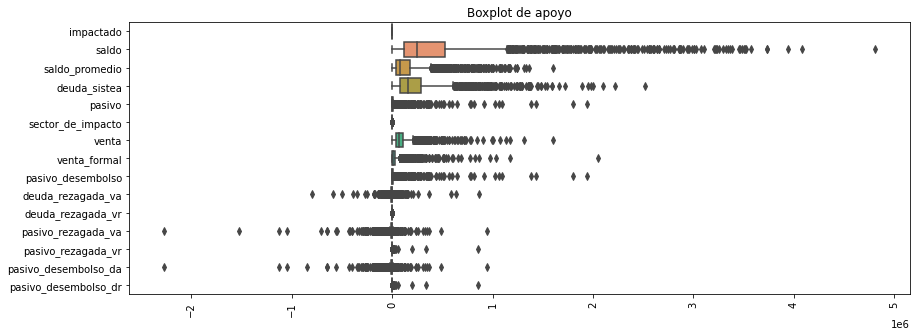

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
ax = sns.boxplot(data=data, orient='h')
plt.title('Boxplot de apoyo')
plt.xticks(rotation=90)
plt.show()

- Las variables **saldo y saldo promedio** serán capeadas al 2.5%.
- La variable **Deuda sistea,** será capeada al 1%.
- La variable **Sector de impacto** no presenta evidencia de valores atípicos, y pese a que lo hubiese, no debería ser tratada porque representa sectores (variable categórica ordinal). Lo mejor es no transformarla o por otro lado, hacerla dicotómica en múltiples variables con valores de 1 y 0.
- La variable **Pasivo_desembolso** será capeada al 5%.
- La variable **Deuda rezagada va** será capeada al 2.5%.
- La variable **pasivo rezagada va** será capeada al 7.5%.
- La variable **Pasivo_desembolso da** será capeada al 5%.

In [33]:
suspects_low = {'saldo':'2.5%',
                'saldo_promedio':'2.5%',
                'deuda_sistea':'1%',
                'pasivo_desembolso':'5%',
                'deuda_rezagada_va':'2.5%',
                'pasivo_rezagada_va':'7.5%',
                'pasivo_desembolso_da':'5%'}

In [34]:
pp_df_low = data[suspects_low].describe(percentiles=[0.01,0.025,0.05,0.075])

In [35]:
pp_df_low

,saldo,saldo_promedio,deuda_sistea,pasivo_desembolso,deuda_rezagada_va,pasivo_rezagada_va,pasivo_desembolso_da
count,1.998000e+03,1.998000e+03,1.998000e+03,1.998000e+03,1998.000000,1.998000e+03,1.998000e+03
mean,4.803591e+05,1.617075e+05,2.483788e+05,2.386792e+04,-3084.037157,-1.743134e+04,-1.478298e+04
std,6.505839e+05,2.185849e+05,2.893351e+05,1.069562e+05,48407.921291,9.419234e+04,8.635662e+04
min,1.107169e+02,5.535847e+01,0.000000e+00,-5.284572e+03,-800000.000000,-2.265108e+06,-2.265108e+06
1%,4.226384e+03,1.440961e+03,3.050061e+03,0.000000e+00,-109204.632100,-2.731804e+05,-2.635176e+05
2.5%,1.099291e+04,3.886581e+03,8.017665e+03,0.000000e+00,-62467.720750,-1.672002e+05,-1.499077e+05
5%,2.122975e+04,7.171513e+03,1.483824e+04,0.000000e+00,-35249.229500,-1.062322e+05,-9.681765e+04
7.5%,3.039396e+04,1.020160e+04,2.119286e+04,4.000000e-02,-25613.174250,-6.768852e+04,-5.586430e+04
50%,2.442257e+05,8.222412e+04,1.540272e+05,2.528565e+03,-2179.090000,-3.174290e+03,-2.548500e+03
max,4.803209e+06,1.601070e+06,2.514941e+06,1.938916e+06,866562.470000,9.418163e+05,9.418163e+05


In [36]:
# Capeo de variables
for var in suspects_low:
    value = pp_df_low.loc[suspects_low[var], str(var)]
    data[str(var)] = np.where(data[str(var)] < value, value, data[str(var)])

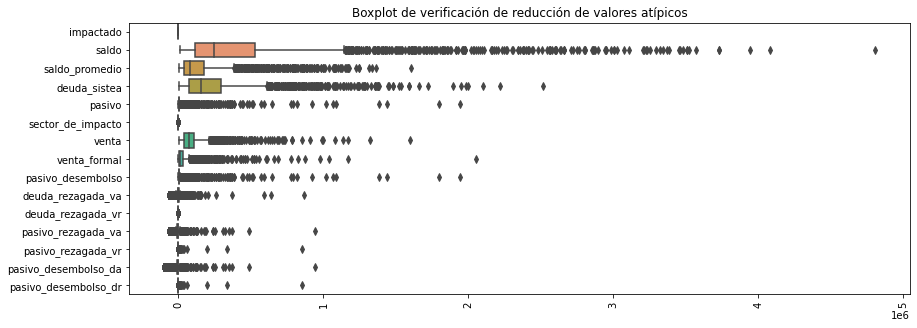

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
ax = sns.boxplot(data=data, orient='h')
plt.title('Boxplot de verificación de reducción de valores atípicos')
plt.xticks(rotation=90)
plt.show()

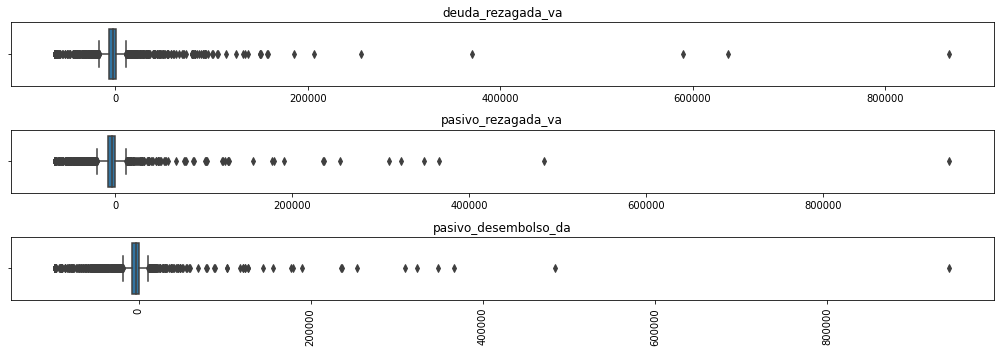

In [38]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(14,5)
ax[0].set_title("deuda_rezagada_va")
sns.boxplot(data=data, x="deuda_rezagada_va", ax=ax[0])
ax[0].set_xlabel('')
ax[1].set_title("pasivo_rezagada_va")
sns.boxplot(data=data, x="pasivo_rezagada_va", ax=ax[1])
ax[1].set_xlabel('')
ax[2].set_title("pasivo_desembolso_da")
sns.boxplot(data=data, x="pasivo_desembolso_da",ax=ax[2])
plt.xticks(rotation=90)
ax[2].set_xlabel('')
fig.tight_layout()
plt.show()

- Estas 3 variables aún tienen gran cantidad de valores atípicos en su nivel inferior, pese al tratamiento realizado, pero se seguirá con el desarrollo para evaluar si más adelante implican una reducción de rendimiento en el algoritmo o no.

#### 3.3.1.2 Detección de valores atípicos superiores

In [39]:
def get_max_outliers_ratio(df):
    df_columns = list(df.columns)
    for column in df_columns:
        print()
        max_value = round(float(df.loc['max', str(column)]), 2)
        min_value = round(float(df.loc['min', str(column)]), 2)
        pp_value_01 = round(float(df.loc['92.5%', str(column)]), 2)
        pp_value_02 = round(float(df.loc['95%', str(column)]), 2)
        pp_value_03 = round(float(df.loc['97.5%', str(column)]), 2)
        if max_value > 1.0:
            if pp_value_01!=0 and pp_value_02!=0 and pp_value_03!=0 and max_value!=0:
                ratio_01 = round(pp_value_02 / pp_value_01, 3)
                ratio_02 = round(pp_value_03 / pp_value_02, 3)
                ratio_03 = round(max_value / pp_value_03, 3)
                print(f' → Ratios of <<{column}>> column: (92.5%-95% → {ratio_01}) (95-97.5%% → {ratio_02}) (97.5%-max → {ratio_03})')
            else:
                print('ERROR')
            

In [40]:
data[numerical_columns].quantile(high_pp)

,impactado,saldo,saldo_promedio,deuda_sistea,pasivo,sector_de_impacto,venta,venta_formal,pasivo_desembolso,deuda_rezagada_va,deuda_rezagada_vr,pasivo_rezagada_va,pasivo_rezagada_vr,pasivo_desembolso_da,pasivo_desembolso_dr
0.91,1.0,1.374676e+06,4.625547e+05,6.326905e+05,4.672841e+04,4.0,208441.60,1.118369e+05,4.582617e+04,10986.9160,0.097099,2721.3318,0.868561,3221.407800,0.890909
0.92,1.0,1.495366e+06,5.005225e+05,6.859386e+05,5.439849e+04,4.0,219962.00,1.227113e+05,5.336609e+04,13961.1952,0.123199,3942.5176,1.267219,4315.479200,1.267219
0.93,1.0,1.620680e+06,5.413288e+05,7.420213e+05,7.037620e+04,4.0,238375.18,1.333197e+05,6.544317e+04,17200.3634,0.147177,5215.4855,1.751382,6026.562800,1.751382
0.94,1.0,1.762212e+06,5.952822e+05,7.935966e+05,8.471576e+04,4.0,260713.00,1.573550e+05,8.150748e+04,22080.1464,0.185025,7805.0506,2.376331,8211.371000,2.376331
0.95,1.0,1.954504e+06,6.553111e+05,8.592521e+05,9.877850e+04,4.0,285190.00,1.745169e+05,9.735610e+04,28509.7710,0.218099,11151.6220,3.868939,12374.447500,3.868939
0.96,1.0,2.210817e+06,7.485636e+05,9.345147e+05,1.272317e+05,4.0,310087.36,2.023185e+05,1.250932e+05,38992.1576,0.291889,16989.3000,7.334902,17488.372800,7.657806
0.97,1.0,2.485721e+06,8.374722e+05,1.012212e+06,1.911314e+05,4.0,357559.24,2.490516e+05,1.911314e+05,49594.5005,0.417744,28164.3329,15.392125,28008.873700,18.391204
0.98,1.0,2.763574e+06,9.211915e+05,1.189859e+06,2.706813e+05,4.0,438036.18,2.918742e+05,2.613144e+05,79799.2114,0.629506,46248.8754,197.280711,44517.806309,221.789883
0.99,1.0,3.213483e+06,1.076076e+06,1.373476e+06,4.275611e+05,4.0,630749.24,4.480324e+05,3.870960e+05,100500.0868,1.178728,102654.3230,3659.833571,117444.219295,3659.833571
1.00,1.0,4.803209e+06,1.601070e+06,2.514941e+06,1.938916e+06,4.0,1598900.00,2.051160e+06,1.938916e+06,866562.4700,13.462875,941816.3500,851658.720900,941816.350000,851658.720900


In [41]:
get_max_outliers_ratio(data.describe(percentiles=[0.925, 0.95, 0.975]))



 → Ratios of <<saldo>> column: (92.5%-95% → 1.247) (95-97.5%% → 1.333) (97.5%-max → 1.843)

 → Ratios of <<saldo_promedio>> column: (92.5%-95% → 1.241) (95-97.5%% → 1.326) (97.5%-max → 1.843)

 → Ratios of <<deuda_sistea>> column: (92.5%-95% → 1.208) (95-97.5%% → 1.259) (97.5%-max → 2.325)

 → Ratios of <<pasivo>> column: (92.5%-95% → 1.637) (95-97.5%% → 2.167) (97.5%-max → 9.056)

 → Ratios of <<sector_de_impacto>> column: (92.5%-95% → 1.0) (95-97.5%% → 1.0) (97.5%-max → 1.0)

 → Ratios of <<venta>> column: (92.5%-95% → 1.249) (95-97.5%% → 1.415) (97.5%-max → 3.963)

 → Ratios of <<venta_formal>> column: (92.5%-95% → 1.367) (95-97.5%% → 1.522) (97.5%-max → 7.724)

 → Ratios of <<pasivo_desembolso>> column: (92.5%-95% → 1.63) (95-97.5%% → 2.199) (97.5%-max → 9.056)

 → Ratios of <<deuda_rezagada_va>> column: (92.5%-95% → 1.846) (95-97.5%% → 2.087) (97.5%-max → 14.562)

 → Ratios of <<deuda_rezagada_vr>> column: (92.5%-95% → 1.692) (95-97.5%% → 2.273) (97.5%-max → 26.92)

 → Ratios of

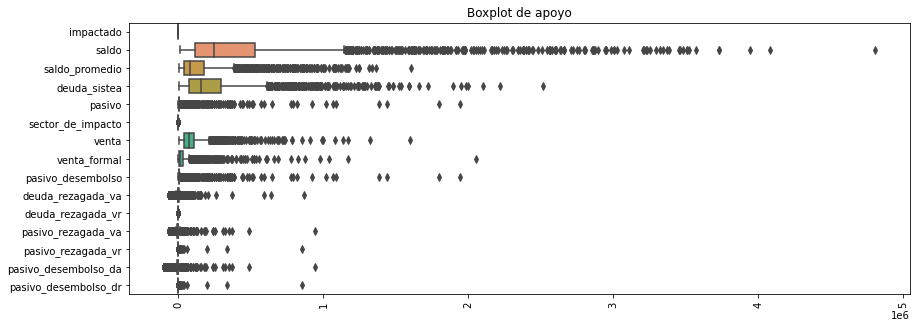

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
ax = sns.boxplot(data=data, orient='h')
plt.title('Boxplot de apoyo')
plt.xticks(rotation=90)
plt.show()

In [43]:
pp_df_top = data[numerical_columns].describe(percentiles=[0.90, 0.925, 0.95, 0.975])

In [44]:
pp_df_top

,impactado,saldo,saldo_promedio,deuda_sistea,pasivo,sector_de_impacto,venta,venta_formal,pasivo_desembolso,deuda_rezagada_va,deuda_rezagada_vr,pasivo_rezagada_va,pasivo_rezagada_vr,pasivo_desembolso_da,pasivo_desembolso_dr
count,1998.000000,1.998000e+03,1.998000e+03,1.998000e+03,1.998000e+03,1998.000000,1.998000e+03,1.998000e+03,1.998000e+03,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,0.500000,4.804935e+05,1.617572e+05,2.483966e+05,2.417518e+04,3.049550,1.002791e+05,3.854919e+04,2.387133e+04,-951.555845,0.027933,-7306.920795,852.139611,-8022.550882,852.446610
std,0.500125,6.504861e+05,2.185488e+05,2.893199e+05,1.073012e+05,0.935072,1.183857e+05,9.858228e+04,1.069553e+05,37336.241419,0.545281,39192.027040,21057.347436,41940.290104,21057.338533
min,0.000000,1.099291e+04,3.886581e+03,3.050061e+03,0.000000e+00,1.000000,2.100000e+03,0.000000e+00,0.000000e+00,-62467.720750,-1.000000,-67688.516250,-1.000000,-96817.654000,-8.786353
50%,0.500000,2.442257e+05,8.222412e+04,1.540272e+05,2.558310e+03,3.000000,6.950000e+04,8.333000e+03,2.528565e+03,-2179.090000,-0.014269,-3174.290000,-0.550924,-2548.500000,-0.543144
90%,1.000000,1.248246e+06,4.178836e+05,5.992101e+05,3.996061e+04,4.000000,1.974299e+05,1.001341e+05,3.880008e+04,9085.167000,0.075927,2027.907000,0.656644,2497.446000,0.671356
92.5%,1.000000,1.567236e+06,5.279077e+05,7.111462e+05,6.034329e+04,4.000000,2.283600e+05,1.276840e+05,5.973770e+04,15442.224250,0.133146,4425.744750,1.430311,5063.794750,1.430311
95%,1.000000,1.954504e+06,6.553111e+05,8.592521e+05,9.877850e+04,4.000000,2.851900e+05,1.745169e+05,9.735610e+04,28509.771000,0.218099,11151.622000,3.868939,12374.447500,3.868939
97.5%,1.000000,2.606308e+06,8.687693e+05,1.081799e+06,2.140997e+05,4.000000,4.034495e+05,2.655683e+05,2.140997e+05,59509.856750,0.504215,37193.201500,77.020827,35769.403000,90.355652
max,1.000000,4.803209e+06,1.601070e+06,2.514941e+06,1.938916e+06,4.000000,1.598900e+06,2.051160e+06,1.938916e+06,866562.470000,13.462875,941816.350000,851658.720900,941816.350000,851658.720900


In [45]:
# Capeo de variables
for var in numerical_columns:
    value = pp_df_top.loc['92.5%', str(var)] # capeo todas las variables al 92.5%
    data[str(var)] = np.where(data[str(var)] > value, value, data[str(var)])

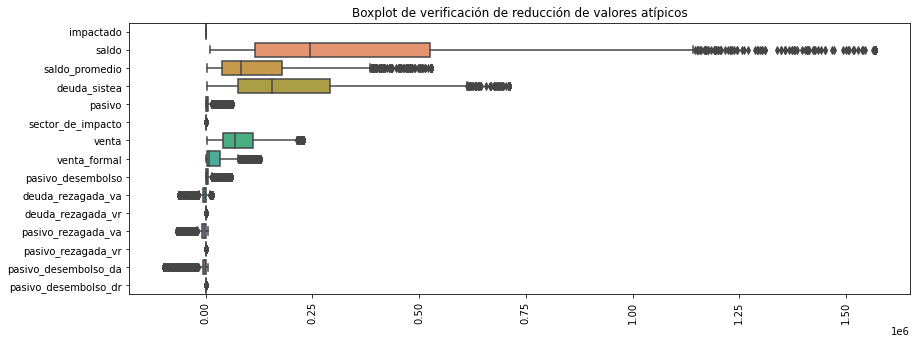

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
ax = sns.boxplot(data=data, orient='h')
plt.title('Boxplot de verificación de reducción de valores atípicos')
plt.xticks(rotation=90)
plt.show()

#### 3.3.1.3 Recodificación de Outliers

In [47]:
data_no_recode = data.copy()

In [48]:
data_num_cols = list(data.drop(['sector','dep','impactado','sector_de_impacto'],axis=1).select_dtypes(['int','float']).columns)

In [49]:
for column in data_num_cols:
    Q1 = data[str(column)].quantile(.25)
    Q3 = data[str(column)].quantile(.75)
    IQR = Q3 - Q1
    data[str(column)] = np.where(data[str(column)] < (Q1 - 1.5*IQR), np.nan, data[str(column)])
    data[str(column)] = np.where(data[str(column)] > (Q3 + 1.5*IQR), np.nan, data[str(column)])

In [50]:
data.shape

(1998, 17)

In [51]:
data.isnull().sum()

sector                    0
dep                       0
impactado                 0
saldo                   233
saldo_promedio          231
deuda_sistea            195
pasivo                  343
sector_de_impacto         0
venta                   170
venta_formal            263
pasivo_desembolso       340
deuda_rezagada_va       406
deuda_rezagada_vr       388
pasivo_rezagada_va      343
pasivo_rezagada_vr      247
pasivo_desembolso_da    342
pasivo_desembolso_dr    250
dtype: int64

In [52]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

In [53]:
data[data_num_cols] = imputer.fit_transform(data[data_num_cols])

In [54]:
data.shape

(1998, 17)

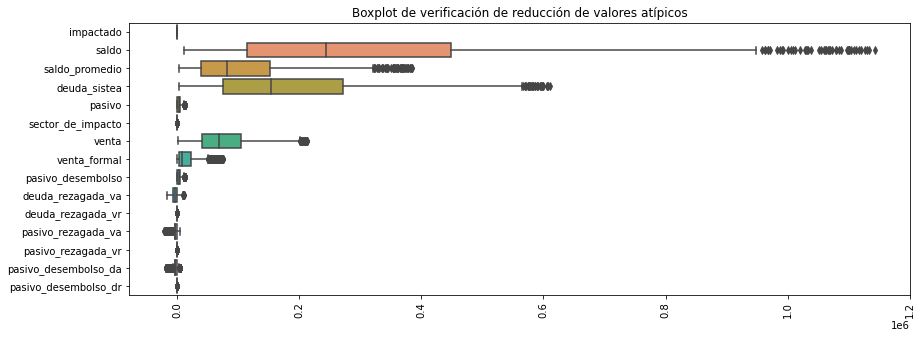

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
ax = sns.boxplot(data=data, orient='h')
plt.title('Boxplot de verificación de reducción de valores atípicos')
plt.xticks(rotation=90)
plt.show()

### 3.3.2 Detección Multivariante

In [56]:
x_all = data_no_recode.copy()

In [57]:
x_all.shape

(1998, 17)

In [58]:
x = x_all[numerical_columns]
x_cat = x_all[categorical_columns]

In [59]:
x.shape, x_cat.shape

((1998, 15), (1998, 2))

In [60]:
x.sample(5)

,impactado,saldo,saldo_promedio,deuda_sistea,pasivo,sector_de_impacto,venta,venta_formal,pasivo_desembolso,deuda_rezagada_va,deuda_rezagada_vr,pasivo_rezagada_va,pasivo_rezagada_vr,pasivo_desembolso_da,pasivo_desembolso_dr
822,0.0,274108.56160,91369.520550,99195.5800,50.00,3.0,61936.0,22402.000,50.000,-4526.49,-0.043641,-6033.00000,-0.991780,-6033.000,-0.991780
1437,1.0,188205.85730,62735.285770,140653.0400,2558.31,3.0,78000.0,19067.170,2528.565,-2372.20,-0.016586,-3174.29000,-0.550924,-2548.500,-0.543144
859,0.0,672908.27070,224302.756900,711146.1765,59425.03,3.0,228360.0,127683.962,59425.030,-34229.36,-0.026852,-67688.51625,-0.737780,-96817.654,-0.737780
116,0.0,84856.54961,28285.516540,109869.7800,0.00,4.0,18000.0,763.670,0.000,-3737.72,-0.032900,-3670.06000,-1.000000,-3670.060,-1.000000
618,0.0,25299.48394,8433.161313,18018.2000,100.02,4.0,11000.0,1983.330,100.020,-1536.63,-0.078581,99.96000,1.430311,99.960,1.430311


In [61]:
Sx = x.cov().values

In [62]:
ISx = sp.linalg.inv(Sx)

In [63]:
centroid = x.mean().values

In [64]:
def fn_mahalanobis(x, centroid, ISx):
    m = []
    # Calculo la DM para cada fila
    for i in range(x.shape[0]):
        m.append(mahalanobis(x.iloc[i, :], centroid, ISx))
                 
    return (m)

In [65]:
md = pd.DataFrame(fn_mahalanobis(x,centroid,ISx), columns=["md"])
x["MD"] = md

In [66]:
new_x = pd.concat([x,x_cat], axis=1)
new_x

,impactado,saldo,saldo_promedio,deuda_sistea,pasivo,sector_de_impacto,venta,venta_formal,pasivo_desembolso,deuda_rezagada_va,deuda_rezagada_vr,pasivo_rezagada_va,pasivo_rezagada_vr,pasivo_desembolso_da,pasivo_desembolso_dr,MD,sector,dep
0,0.0,56643.100920,28321.550460,31365.7300,5876.82,3.0,108400.0,43741.080,5876.820,-800.65000,-0.024891,830.82,0.164649,830.82,0.164649,2.558554,INDUSTRIA,Lima
1,0.0,190313.994600,63437.998180,64864.9900,4467.40,4.0,105300.0,69737.170,4467.400,-2810.52000,-0.041529,-7043.43,-0.611896,-7043.43,-0.611896,2.356606,COMERCIO,Arequipa
2,0.0,547601.573600,182533.857900,200239.3200,5000.92,1.0,86600.0,79178.830,5000.920,653.68000,0.003275,2000.92,0.666973,2000.92,0.666973,3.776162,SERVICIO,Amazonas
3,0.0,283914.208400,94638.069470,112945.1700,325.50,3.0,103000.0,0.000,325.500,14820.77000,0.133146,-17128.30,-0.981351,-17128.30,-0.981351,2.676896,INDUSTRIA,Lima
4,0.0,142296.438400,47432.146120,144877.2100,0.00,4.0,172920.0,127683.962,0.000,15442.22425,0.133146,-2071.80,-1.000000,-2071.80,-1.000000,4.496472,COMERCIO,Cusco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1.0,10992.910395,3886.581480,3050.0606,2558.31,4.0,30000.0,4905.000,2528.565,-710.56000,-0.304304,-3174.29,-0.550924,-2548.50,-0.543144,4.330457,COMERCIO,Lambayeque
1994,1.0,94650.626310,31550.208770,75502.8400,3029.48,4.0,32100.0,7034.000,3029.480,-5421.28000,-0.066992,-10965.03,-0.783524,-10965.03,-0.783524,1.800943,COMERCIO,Arequipa
1995,1.0,747579.335100,249193.111700,711146.1765,593.99,3.0,180905.0,93482.000,593.990,6776.19000,0.008094,-11589.60,-0.951247,-11589.60,-0.951247,4.624891,COMERCIO,Lima
1996,1.0,18077.981870,6025.993957,122633.1000,5312.64,3.0,69500.0,8333.000,5312.640,-3838.01000,-0.030347,-18929.55,-0.780851,-18929.55,-0.780851,1.751050,COMERCIO,Lima


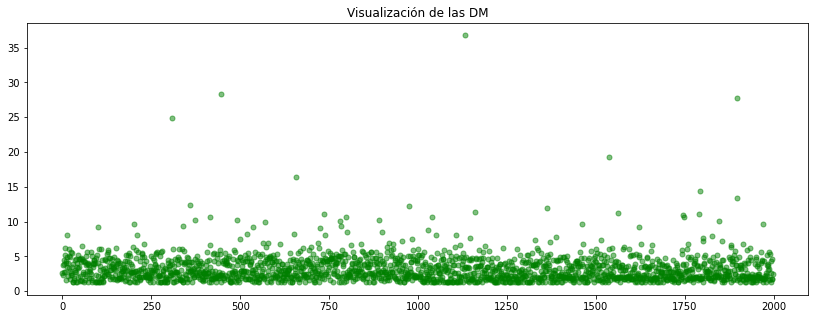

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
ax.scatter(new_x.index, new_x.MD, alpha=0.5, s=25, c='green')
plt.title('Visualización de las DM')
plt.show()

- Tomaré cmo punto de corte a una distancia de 13, porque visualmente se observa que se alejan mucho de la distribución.

In [68]:
cutoff = 13

In [69]:
new_x.loc[new_x['MD'] > cutoff].shape

(8, 18)

In [70]:
new_x[ new_x.MD > cutoff ]

,impactado,saldo,saldo_promedio,deuda_sistea,pasivo,sector_de_impacto,venta,venta_formal,pasivo_desembolso,deuda_rezagada_va,deuda_rezagada_vr,pasivo_rezagada_va,pasivo_rezagada_vr,pasivo_desembolso_da,pasivo_desembolso_dr,MD,sector,dep
309,0.0,1.567236e+06,527907.743895,711146.1765,60343.29325,3.0,150070.0,127683.962,7256.17935,15442.22425,0.022450,4425.74475,0.463051,-96817.65400,-0.931744,24.851100,SERVICIO,Lima
445,0.0,3.368908e+05,198131.484400,99580.5600,60343.29325,4.0,29240.0,15543.330,0.00000,8778.63000,0.096679,4425.74475,1.430311,-27165.45787,-1.059897,28.274470,INDUSTRIA,Lima
658,0.0,1.406778e+05,140677.771800,3050.0606,60343.29325,3.0,161850.0,115842.170,59737.70050,0.00000,-0.014269,-67688.51625,-0.222520,-95513.69000,-0.222520,16.370513,COMERCIO,Lima
1131,1.0,7.136404e+05,248190.836400,248554.9300,1651.00000,4.0,70910.0,36308.000,1651.00000,15442.22425,0.133146,-29069.00000,-0.946257,1863.03764,-8.786353,36.779768,COMERCIO,Huánuco
1538,1.0,2.542817e+05,127140.834800,261475.1000,19403.72000,3.0,150140.0,16050.420,19403.72000,15442.22425,0.133146,-67688.51625,-0.840233,5063.79475,-4.409650,19.329457,COMERCIO,Arequipa
1792,1.0,5.086841e+05,254342.066400,312377.6800,2558.31000,4.0,35200.0,5000.000,2528.56500,15442.22425,0.133146,-3174.29000,-0.550924,-2548.50000,-0.543144,14.411569,COMERCIO,Huánuco
1896,1.0,1.567236e+06,527907.743895,674775.9100,60343.29325,3.0,108000.0,24991.330,0.00000,-22062.89000,-0.031661,4425.74475,1.430311,-20870.07196,-1.339070,27.811692,INDUSTRIA,Lima
1897,1.0,5.464332e+05,214066.203400,218396.7100,30915.54000,4.0,134330.0,0.000,30915.54000,15442.22425,0.133146,-67688.51625,-0.729018,5063.79475,1.194563,13.438912,COMERCIO,Lima


- Hay únicamente 8 obervaciones consideradas como outliers multivariados.

In [71]:
treated_data = new_x.loc[new_x['MD'] < cutoff, :].drop('MD',axis=1)

In [72]:
#treated_data.to_excel("output/treated-data.xlsx")

In [73]:
treated_data = treated_data.reset_index(drop=True)

# 4. Feature Engineering

In [74]:
df = treated_data.copy()

## 4.1 Ingeniería de variables categóricas

- Observaré si las proporciones de las variables categóricas son realmente diferenciables:

In [75]:
df.sector.value_counts()

COMERCIO     1135
SERVICIO      601
INDUSTRIA     254
Name: sector, dtype: int64

In [76]:
df.dep.value_counts()

Lima             720
Arequipa         188
Junín            118
La Libertad      104
Lambayeque        98
San Martín        88
Piura             87
Áncash            74
Cajamarca         55
Ica               52
Huánuco           51
Cusco             48
Tacna             36
Callao            35
Ucayali           34
Pasco             28
Ayacucho          27
Tumbes            27
Puno              26
Amazonas          23
Loreto            22
Moquegua          18
Apurímac          15
Madre de Dios     14
Huancavelica       2
Name: dep, dtype: int64

- Las proporciones están muy centralizadas en Lima. Se dejará sin tratamiento y si las métricas lo solicitan, se transformará la variable a categórica de 3 alternativas.

In [77]:
df['sector_de_impacto'].value_counts()

3.0    963
4.0    681
1.0    240
2.0    106
Name: sector_de_impacto, dtype: int64

In [78]:
df.shape

(1990, 17)

In [79]:
df_numeric = df.select_dtypes(['int','float'])
df_categorical = df.select_dtypes('object')

In [80]:
df_numeric.shape, df_categorical.shape # Incluye target

((1990, 15), (1990, 2))

In [81]:
df_cat_to_num = pd.DataFrame()

le = LabelEncoder()
df_cat_to_num['sector_num'] = le.fit_transform(df_categorical['sector'])

le = LabelEncoder()
df_cat_to_num['dep_num'] = le.fit_transform(df_categorical['dep'])

In [82]:
df_cat_to_num.shape, df_categorical.shape

((1990, 2), (1990, 2))

In [83]:
df_cat_to_num.sample(3)

,sector_num,dep_num
1203,0,14
672,2,13
95,2,13


## 4.2 Ingeniería de variables numéricas

In [84]:
df_numeric_no_target = df_numeric.drop('impactado',axis=1)

In [85]:
df_numeric_no_target.shape

(1990, 14)

In [86]:
scaler = MinMaxScaler()
array_numeric = scaler.fit_transform(df_numeric_no_target)
df_numeric_scaled = pd.DataFrame(array_numeric, columns=df_numeric_no_target.columns)

In [87]:
df_numeric_scaled.shape

(1990, 14)

## 4.3 Creación de variables

- Agregaré una constante para diferenciar las variables que están aportando más al modelo.

In [88]:
df_numeric_scaled.shape, df_cat_to_num.shape, df_numeric[['impactado']].shape

((1990, 14), (1990, 2), (1990, 1))

In [89]:
dataset = pd.concat([df_numeric_scaled, df_cat_to_num, df_numeric[['impactado']]], axis=1)

In [90]:
dataset.shape

(1990, 17)

- Calcularé los coeficientes de variación para la creación de variables robustas.

In [91]:
all_cv = []

for col in list (df_numeric_scaled.columns):
    media = dataset[col].mean()
    d_estandar = dataset[col].std()
    Coef_variacion = d_estandar/media*100
    value = round(Coef_variacion, 2)
    all_cv.append(value)

In [92]:
cv_table = pd.concat([
    pd.DataFrame( {'Variable':list(df_numeric_scaled.columns)} ),
    pd.DataFrame( {'CV':all_cv} )],
    axis=1)

In [93]:
cv_table.sort_values('CV', ascending=False).reset_index(drop=True)

,Variable,CV
0,pasivo,181.80
1,pasivo_desembolso,181.46
2,venta_formal,144.86
3,saldo_promedio,110.88
4,saldo,110.80
5,pasivo_rezagada_vr,103.07
6,deuda_sistea,93.27
7,venta,73.44
8,pasivo_desembolso_dr,49.94
9,sector_de_impacto,45.71


> En esta matriz no se consideraron las variables categóricas numerizadas y la variable target.

In [94]:
dataset.columns

Index(['saldo', 'saldo_promedio', 'deuda_sistea', 'pasivo',
       'sector_de_impacto', 'venta', 'venta_formal', 'pasivo_desembolso',
       'deuda_rezagada_va', 'deuda_rezagada_vr', 'pasivo_rezagada_va',
       'pasivo_rezagada_vr', 'pasivo_desembolso_da', 'pasivo_desembolso_dr',
       'sector_num', 'dep_num', 'impactado'],
      dtype='object')

In [95]:
dataset.shape, df.shape

((1990, 17), (1990, 17))

In [96]:
dataset['flag_constante'] = 1
dataset['pasivo_div_pasivo_desembolso'] = dataset['pasivo_desembolso'] / (dataset['pasivo'] + 1)
dataset['saldo_div_venta'] = dataset['saldo'] / (dataset['venta'] + 1)
dataset['venta_div_deu_rez_va'] = dataset['venta'] / (dataset['deuda_rezagada_va'] + 1)
dataset['venta_div_deu_rez_vr'] = dataset['venta'] / (dataset['deuda_rezagada_vr'] + 1)
dataset['dep_is_lima'] = df.apply(lambda x: int(1 if x.dep=='Lima' else 0),axis=1) # llega a 0.61
dataset['deuda_sistea_div_saldo'] = dataset['deuda_sistea'] / (dataset['saldo'] + 1) # mantiene el 0.61
dataset['saldo_promedio_div_saldo'] = dataset['saldo_promedio'] / (dataset['saldo'] + 1) # mantiene el 0.61
dataset['deuda_rez_va_sum_deuda_rez_vr'] = dataset['deuda_rezagada_va'] + dataset['deuda_rezagada_vr'] # llega a 0.62
dataset['deuda_rez_va_div_pasivo_rez_va'] = dataset['deuda_rezagada_va'] / (dataset['pasivo_rezagada_va'] + 1) # llega a 0.64
dataset['venta_formal_sum_pasivo'] = dataset['venta_formal'] + dataset['pasivo'] # mantiene el 0.64
#dataset['is_comercio'] = df.apply(lambda x: int(1 if x.sector=='COMERCIO' else 0) ,axis=1)
#dataset['pasivo_div_pasivo_rez_va'] = dataset['pasivo'] / (dataset['pasivo_rezagada_va'] + 1)
#dataset['dep_is_lima_or_aqp'] = df.apply(lambda x: int(1 if x.dep=='Lima' or x.dep=='Arequipa' else 0),axis=1)

In [97]:
df.sector.value_counts()

COMERCIO     1135
SERVICIO      601
INDUSTRIA     254
Name: sector, dtype: int64

In [98]:
dataset.shape

(1990, 28)

# 5. Feature Selection

In [99]:
predictors = dataset.drop('impactado',axis=1)
target = dataset.impactado

In [100]:
predictors.shape, target.shape

((1990, 27), (1990,))

## 5.1 Selection by Ensemble model: Random Forest

In [101]:
rfc = RandomForestClassifier(random_state=10)
rfc.fit(predictors, target)

RandomForestClassifier(random_state=10)

In [102]:
importances_table = pd.concat([
    pd.DataFrame( {'Variable':list(predictors.columns)} ),
    pd.DataFrame( {'Importancia':list(rfc.feature_importances_)} )],
    axis=1)

In [103]:
importances_table_sorted = importances_table.sort_values('Importancia',ascending=False).reset_index(drop=True)

In [104]:
importances_table_sorted

,Variable,Importancia
0,dep_num,0.067301
1,deuda_sistea_div_saldo,0.057188
2,saldo_div_venta,0.050384
3,venta_formal_sum_pasivo,0.049444
4,deuda_sistea,0.048738
5,venta_div_deu_rez_vr,0.047964
6,venta_div_deu_rez_va,0.046502
7,deuda_rez_va_div_pasivo_rez_va,0.042621
8,saldo,0.042181
9,saldo_promedio_div_saldo,0.041923


- El algoritmo considera que todas las variables aportan al modelo.

In [105]:
rf_subset = importances_table_sorted.iloc[0:21,0].values

In [106]:
rf_subset = list(rf_subset)

## 5.2 Selection by Ensemble model: Light GBM

- Discriminación de importancia con el algoritmo elegido:

In [107]:
feat_imp_model = LGBMClassifier(random_state=10)

In [108]:
feat_imp_model.fit(dataset.drop('impactado',axis=1), dataset.impactado)

LGBMClassifier(random_state=10)

In [109]:
feat_importances_table = pd.DataFrame({'Variable': list((dataset.drop('impactado',axis=1)).columns),
                                       'Feature_importances':list(feat_imp_model.feature_importances_)})
feat_importances_table = feat_importances_table.sort_values('Feature_importances',ascending=False)

In [110]:
feat_importances_table = feat_importances_table.reset_index(drop=True)

In [111]:
feat_importances_table

,Variable,Feature_importances
0,deuda_rezagada_vr,206
1,deuda_rez_va_div_pasivo_rez_va,198
2,venta_formal_sum_pasivo,189
3,dep_num,189
4,deuda_sistea_div_saldo,188
5,saldo_div_venta,164
6,venta_formal,160
7,pasivo,159
8,deuda_sistea,154
9,deuda_rez_va_sum_deuda_rez_vr,148


In [112]:
alg_subset = feat_importances_table.iloc[:19, 0]

In [113]:
alg_subset = list(alg_subset.values)

## 5.3 Boruta Method

In [114]:
rfc = RandomForestClassifier(random_state=10)

In [115]:
boruta_selector = BorutaPy( rfc, n_estimators='auto', perc=90, alpha=0.05, verbose=0, random_state=10)

In [116]:
boruta_x = dataset.drop('impactado',axis=1).values
boruta_y = dataset.impactado.values

In [117]:
%%time
boruta_selector.fit(boruta_x, boruta_y)

Wall time: 31.9 s


BorutaPy(estimator=RandomForestClassifier(n_estimators=24,
                                          random_state=RandomState(MT19937) at 0x16177CFC940),
         n_estimators='auto', perc=90,
         random_state=RandomState(MT19937) at 0x16177CFC940)

In [118]:
boruta_selector.n_features_

3

In [119]:
boruta_vars_mask = list(boruta_selector.support_)
len(boruta_vars_mask)

27

In [120]:
dataset_cols_no_target = list(dataset.drop('impactado',axis=1).columns )
len(dataset_cols_no_target)

27

In [121]:
zip_cols_bor = [k for k in zip(boruta_vars_mask, dataset_cols_no_target)]

In [122]:
boruta_list = []
for pair in  zip_cols_bor:
    if pair[0]:
        boruta_list.append(str(pair[1]))
        print(f' Se agregó <{pair[1]}>')
    

 Se agregó <saldo_div_venta>
 Se agregó <deuda_sistea_div_saldo>
 Se agregó <venta_formal_sum_pasivo>


In [123]:
boruta_list

['saldo_div_venta', 'deuda_sistea_div_saldo', 'venta_formal_sum_pasivo']

# 6. Modelado

## 6.1 División del dataset

In [124]:
predictors_filtered = predictors[ alg_subset ]

In [125]:
predictors_filtered.shape, target.shape

((1990, 19), (1990,))

In [126]:
X_train, X_test, y_train, y_test = train_test_split(predictors_filtered,
                                                    target,
                                                    test_size=0.30,
                                                    random_state=10,
                                                    stratify=target)

In [127]:
X_train.shape, X_test.shape

((1393, 19), (597, 19))

In [128]:
y_train.shape, y_test.shape

((1393,), (597,))

## 6.2 Desarrollo del modelo

In [129]:
dataset.impactado.value_counts()

0.0    996
1.0    994
Name: impactado, dtype: int64

In [130]:
model = LGBMClassifier(n_estimators=300, n_jobs=-1, max_depth=7,random_state=10)

In [131]:
model.fit(X_train, y_train)

LGBMClassifier(max_depth=7, n_estimators=300, random_state=10)

In [132]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 6.3 Métricas de desempeño

- **Métricas para set de entrenamiento:**

In [133]:
print(classification_report(y_train, y_train_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       697
           1       0.95      1.00      0.97       696

    accuracy                           0.97      1393
   macro avg       0.97      0.97      0.97      1393
weighted avg       0.97      0.97      0.97      1393



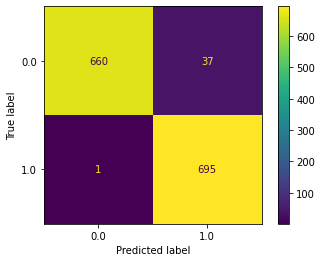

In [134]:
cm_train = confusion_matrix(y_train, y_train_pred)

conf_mat_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=model.classes_)
conf_mat_train.plot()
plt.show()

- **Métricas para set de test:**

In [135]:
print(classification_report(y_test, y_test_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61       299
           1       0.62      0.64      0.63       298

    accuracy                           0.62       597
   macro avg       0.62      0.62      0.62       597
weighted avg       0.62      0.62      0.62       597



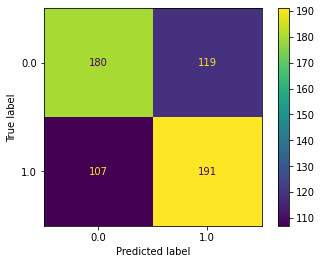

In [136]:
cm_test = confusion_matrix(y_test, y_test_pred)

conf_mat_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=model.classes_)
conf_mat_test.plot()
plt.show()

# 7. Optimización de hiper parámetros

In [137]:
cv_params = {'max_depth': [2,3,4],
            'n_estimators':[100, 200, 300, 400],
            'learning_rate':[0.01,0.001],
            'feature_fraction':[0.70,0.75,0.80],
            'bagging_fraction':[0.70,0.75,0.80],
            'learning_rate':[0.1,0.01],
            'num_leaves':[6,7,8,9]}

In [138]:
optimized_model = GridSearchCV(model, cv_params, scoring='accuracy', cv = 5)

In [139]:
#%%time # 10min and 54seg
# optimized_model.fit(X_train, y_train)

In [140]:
#print(optimized_model.best_params_)

In [141]:
# print(optimized_model.best_score_) # 0.62

In [142]:
best_lgb = LGBMClassifier(n_estimators=100,
                              max_depth=4,
                              num_leaves=9,
                              objective='binary',
                              learning_rate=0.1,
                              feature_fraction=0.7,
                              bagging_fraction=0.7,
                              is_unbalance=False,
                              n_jobs=-1, 
                              random_state=10)

In [143]:
best_lgb.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


LGBMClassifier(bagging_fraction=0.7, feature_fraction=0.7, is_unbalance=False,
               max_depth=4, num_leaves=9, objective='binary', random_state=10)

- Predicciones con el algoritmo optimizado:

In [144]:
y_train_pred_best = best_lgb.predict(X_train)
y_test_pred_best = best_lgb.predict(X_test)

- Métricas para el set de entrenamiento con el algoritmo mejorado:

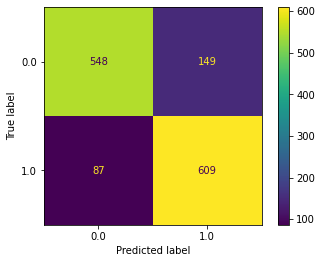

In [145]:
best_cm_train = confusion_matrix(y_train, y_train_pred_best)

best_conf_mat_test = ConfusionMatrixDisplay(confusion_matrix=best_cm_train,
                              display_labels=best_lgb.classes_)
best_conf_mat_test.plot()
plt.show()

In [146]:
print(classification_report(y_train, y_train_pred_best, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       697
           1       0.80      0.88      0.84       696

    accuracy                           0.83      1393
   macro avg       0.83      0.83      0.83      1393
weighted avg       0.83      0.83      0.83      1393



> Se observa que con la optimización el accuracy se ha reducido, pero el algoritmo identifica un 9% mejor la clase de interés (variable impactado).

In [147]:
probs_train = best_lgb.predict_proba(X_train)[:,1:]
m_train=pd.DataFrame(probs_train,columns = ['probs'])
print(m_train)

         probs
0     0.388443
1     0.473042
2     0.829270
3     0.089543
4     0.648250
...        ...
1388  0.612367
1389  0.755208
1390  0.583015
1391  0.614909
1392  0.105793

[1393 rows x 1 columns]


In [148]:
y_train_df = pd.DataFrame(y_train, columns=['impactado']).reset_index(drop=True)
y_train_df['probs'] = m_train

In [149]:
y_train_df

,impactado,probs
0,0.0,0.388443
1,1.0,0.473042
2,1.0,0.829270
3,0.0,0.089543
4,1.0,0.648250
...,...,...
1388,1.0,0.612367
1389,1.0,0.755208
1390,1.0,0.583015
1391,1.0,0.614909


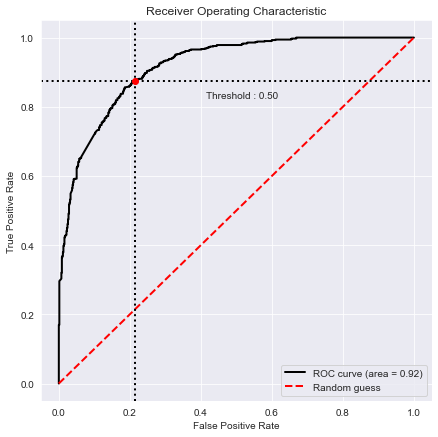

In [150]:
bc = BinaryClassification(y_train_df["impactado"], y_train_df["probs"], labels=["Class 1", "Class 2"])

plt.figure(figsize=(7,7))
bc.plot_roc_curve()
plt.show()

---

- Métricas para el set de test con el algoritmo optimizado:

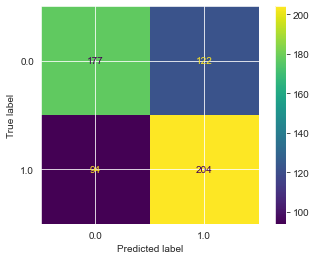

In [151]:
best_cm_test = confusion_matrix(y_test, y_test_pred_best)

best_conf_mat_test = ConfusionMatrixDisplay(confusion_matrix=best_cm_test,
                              display_labels=model.classes_)
best_conf_mat_test.plot()
plt.show()

In [152]:
print(classification_report(y_test, y_test_pred_best, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       299
           1       0.63      0.68      0.65       298

    accuracy                           0.64       597
   macro avg       0.64      0.64      0.64       597
weighted avg       0.64      0.64      0.64       597



In [153]:
probs_test = best_lgb.predict_proba(X_test)[:,1:]
m_test=pd.DataFrame(probs_test,columns = ['Probs'])
print(m_test)

        Probs
0    0.336408
1    0.027710
2    0.170021
3    0.419681
4    0.750171
..        ...
592  0.262892
593  0.447556
594  0.520582
595  0.535616
596  0.496981

[597 rows x 1 columns]


In [154]:
y_test_df = pd.DataFrame(y_test, columns=['impactado']).reset_index(drop=True)
y_test_df['probs'] = m_test

In [155]:
y_test_df

,impactado,probs
0,0.0,0.336408
1,0.0,0.027710
2,1.0,0.170021
3,0.0,0.419681
4,1.0,0.750171
...,...,...
592,1.0,0.262892
593,0.0,0.447556
594,1.0,0.520582
595,1.0,0.535616


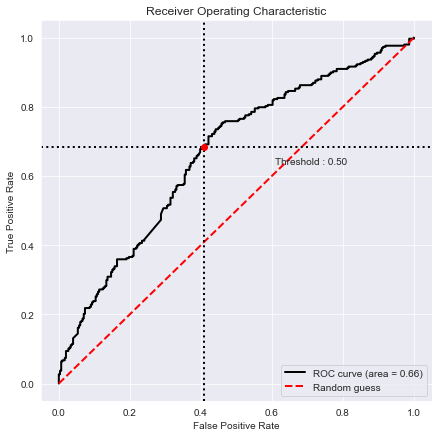

In [156]:
bc = BinaryClassification(y_test_df["impactado"], y_test_df["probs"], labels=["Class 1", "Class 2"])

plt.figure(figsize=(7,7))
bc.plot_roc_curve()
plt.show()

## 8. Conclusiones

- Se coonsiguió el desarrollo de un modelo que predice con un accuracy de 64%.
- Se obtuvo un recall de casi 70%, por lo que se estableció como prioridad la predicción de las empresas impactadas (las etiquetas de 1).
- Se logró mejorar las métricas de desempeño con las técnicas de feature selection y la implementación de un algoritmo ensamblado (Light GBM).